In [1]:
from keras.datasets.mnist import load_data
import keras

Using TensorFlow backend.


In [2]:
(trainX, trainY), (testX, testY) = load_data()
print(trainX.shape)
print(testX.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
import matplotlib.pyplot as plt

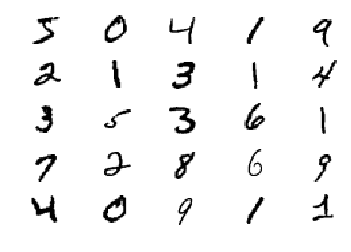

In [4]:
for i in range(25):
    plt.subplot(5, 5, 1+i)
    plt.axis('off')
    plt.imshow(trainX[i], cmap='gray_r')
plt.show()

In [5]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import LeakyReLU
from keras.layers import Dense
from keras.layers import Dropout, Flatten
from keras.utils.vis_utils import plot_model

In [9]:
def define_discriminator(in_shape = (28, 28, 1)):
    model = keras.models.Sequential()
    model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Conv2D(64, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    
    opt = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss = 'binary_crossentropy', optimizer=opt)
    
    return model

model = define_discriminator()
model.summary()
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
__________